In [20]:
suppressPackageStartupMessages({

    library(VariantAnnotation)
    library(tidyverse)
    library(glue)
    library(magrittr)
    library(here)
    library(bdkn)
    library(rtracklayer)

})

In [2]:
source(here("src/utils.R"))

In [3]:
gt <- read_gt(here("data/vcf/merged_full.vcf.gz"))

In [4]:
gt$REF %>% table

.
    A     C     G     T 
56443 53588 53249 56313 

In [5]:
gt$ALT %>% table

.
    A     C     G     T 
53946 55609 55944 54094 

In [6]:
snp_props <- gt %>%
    mutate(snp = REF %+% "-" %+% ALT) %>%
    select(-(chrom:ALT), -reference, -Chimp, -comb_neand) %>%
    group_by(snp) %>%
    summarise_all(~mean(., na.rm = TRUE)) %>%
    gather(ind, proportion, -snp)

In [15]:
snp_props %>% group_by(ind) %>% summarise(sum_prop = mean(proportion)) %>% arrange(sum_prop)

ind,sum_prop
ustishim,0.001452207
bichon,0.001905865
S_Karitiana-1,0.001995246
kk1,0.002136145
loschbour,0.002299461
S_Han-2,0.002542653
S_Dai-2,0.002708737
S_Papuan-2,0.002736595
S_French-1,0.002775254
S_Sardinian-1,0.002908824


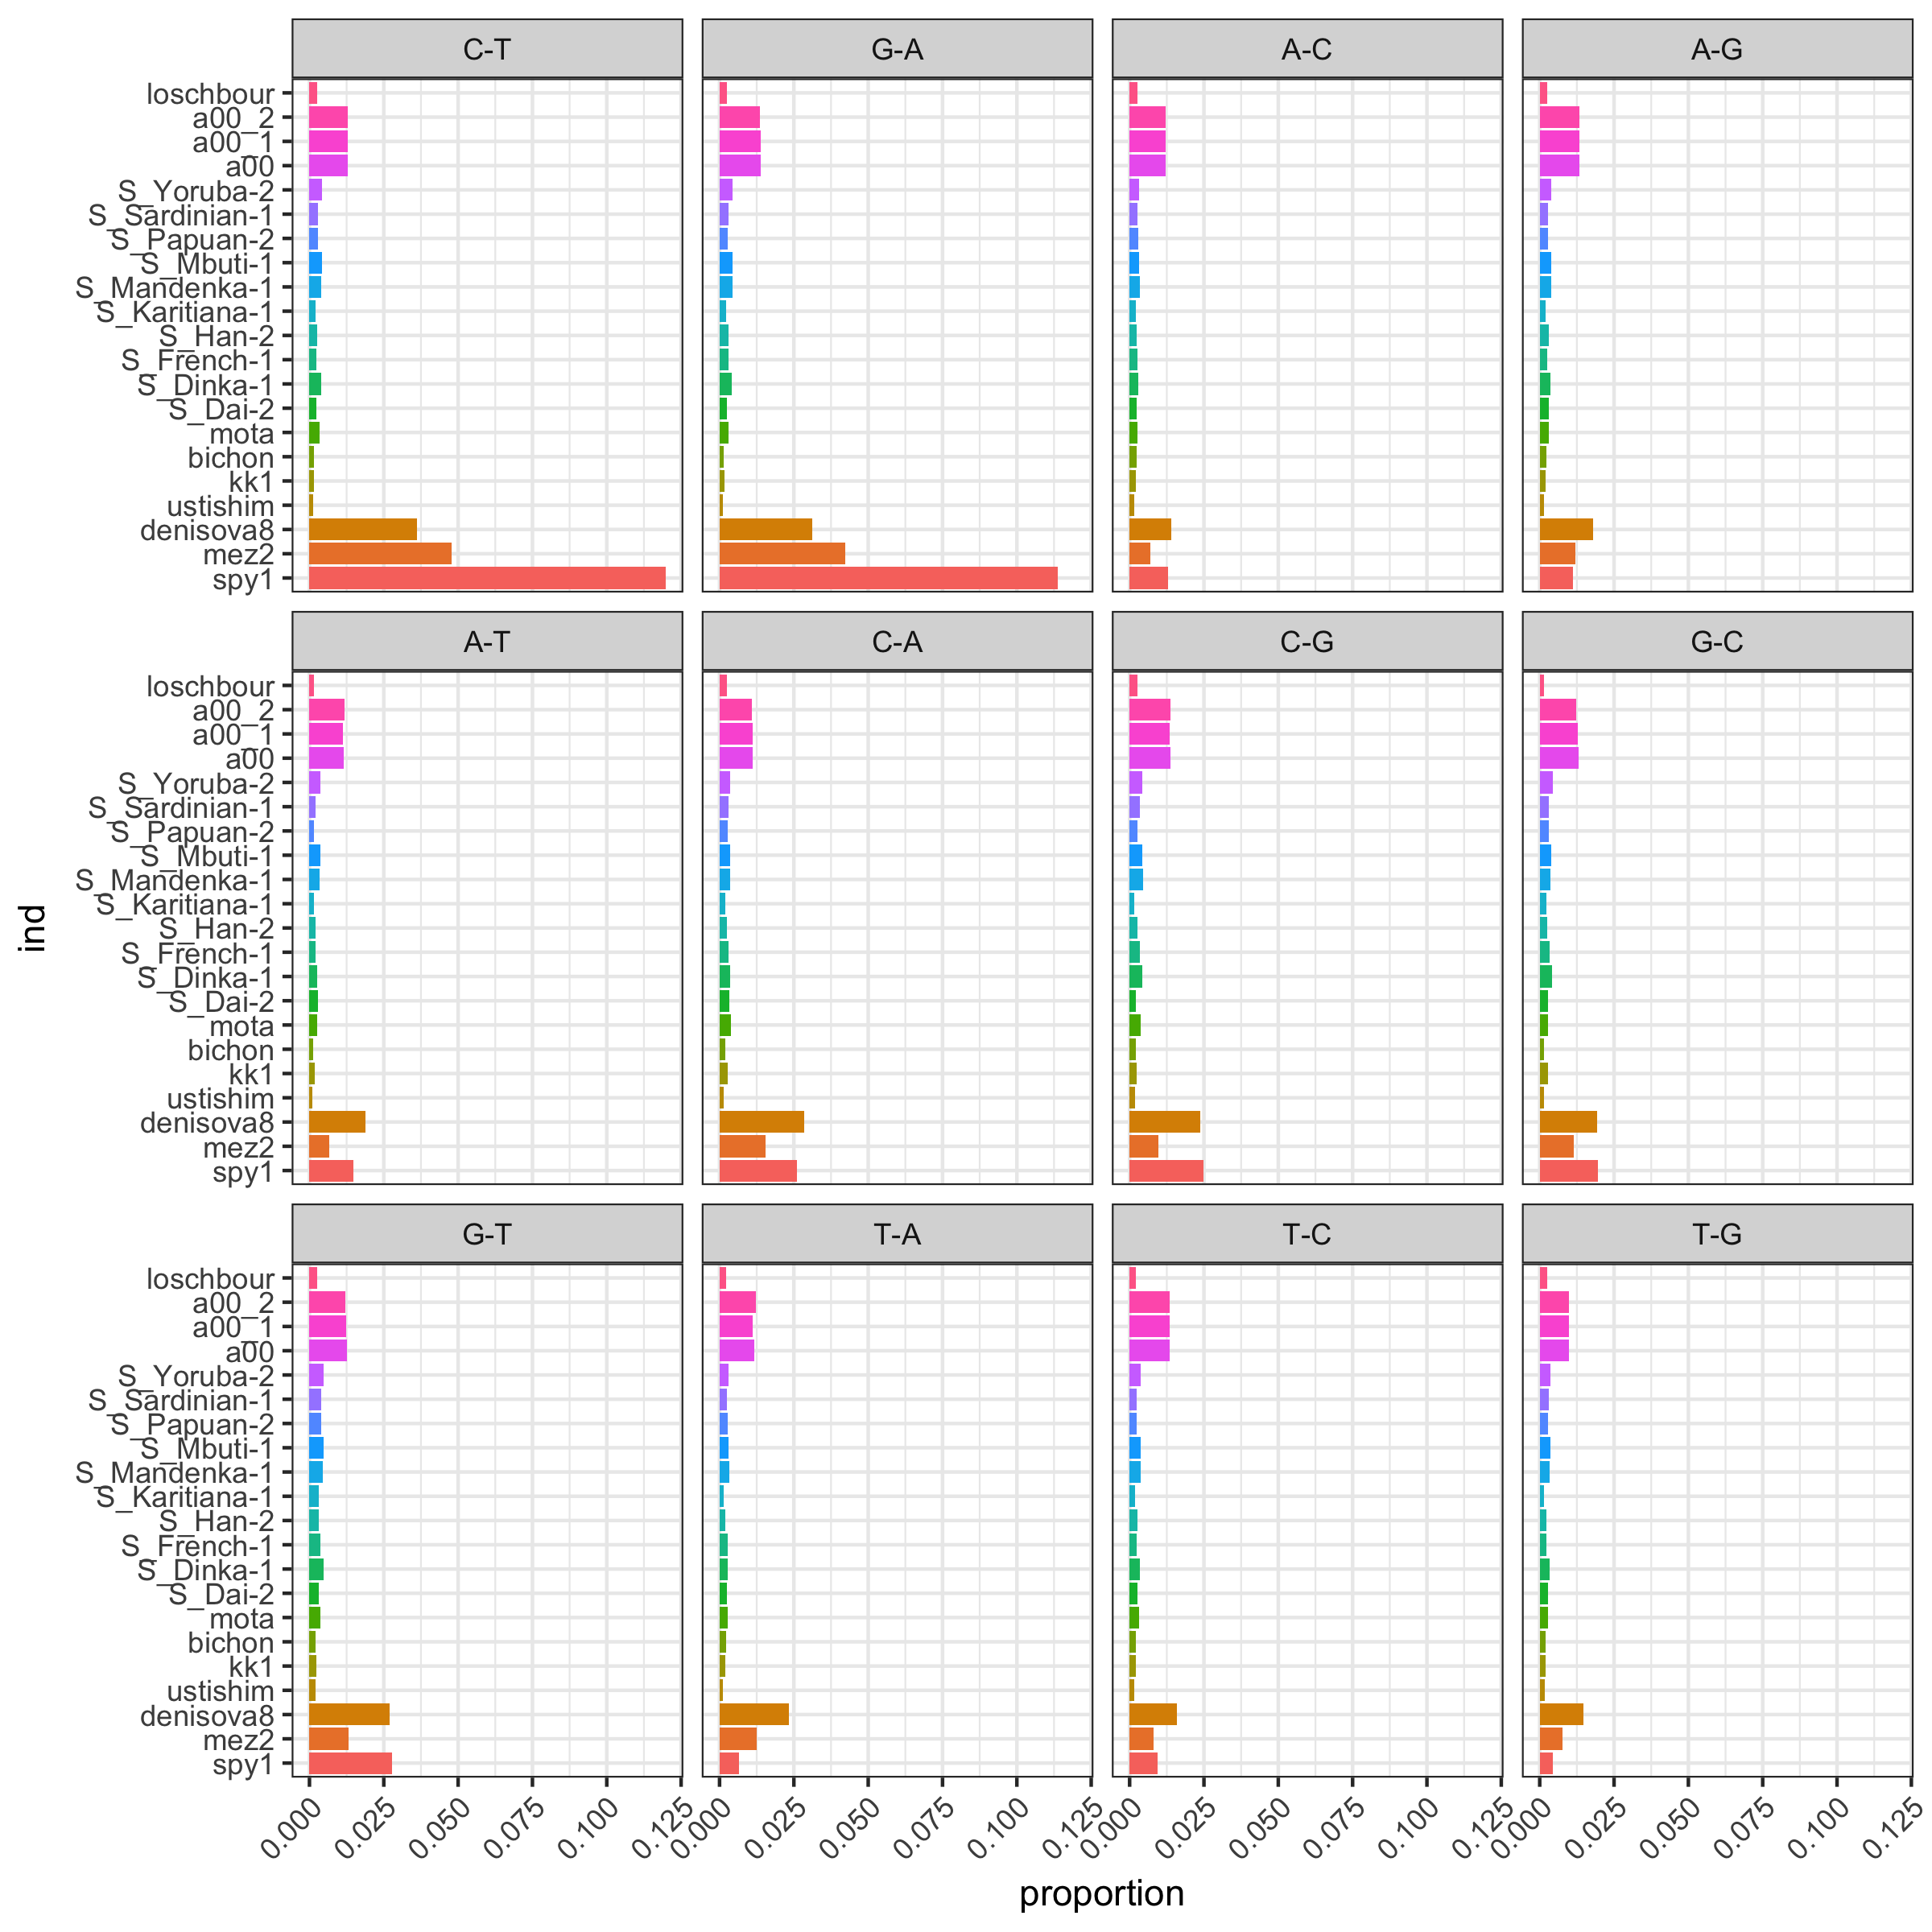

In [16]:
set_dim(8, 8, 300)

snp_props %>%
mutate(snp = fct_relevel(snp, c("C-T", "G-A")),
       ind = fct_relevel(ind, c("spy1", "mez2", "denisova8", "ustishim", "kk1", "bichon", "mota"))) %>%
ggplot(aes(ind, proportion, fill = ind)) + geom_bar(stat = "identity") + facet_wrap(~ snp) +
    coord_flip() +
    theme_bw() +
    theme(legend.position = "none", axis.text.x = element_text(hjust = 1, angle = 45))

In [17]:
select(gt, starts_with("a00")) %>%
filter(complete.cases(.)) %>%
distinct()

a00,a00_1,a00_2
0,0,0
1,1,1


In [18]:
select(gt, c("spy1", "mez2", "comb_neand")) %>%
filter(complete.cases(.)) %>%
distinct()

spy1,mez2,comb_neand
0,0,0
1,1,1


In [33]:
mapq <-
    list.files(here("data/bam"), "full.*.bam$", full.names = TRUE) %>%
    map_dfr(function(bam) {
        data.frame(
            name = basename(bam) %>% str_replace_all("^[a-z]+_|.bam$", ""),
            mapq = glue("samtools view {bam} | cut -f5") %>% pipe %>% scan
        )
    })

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


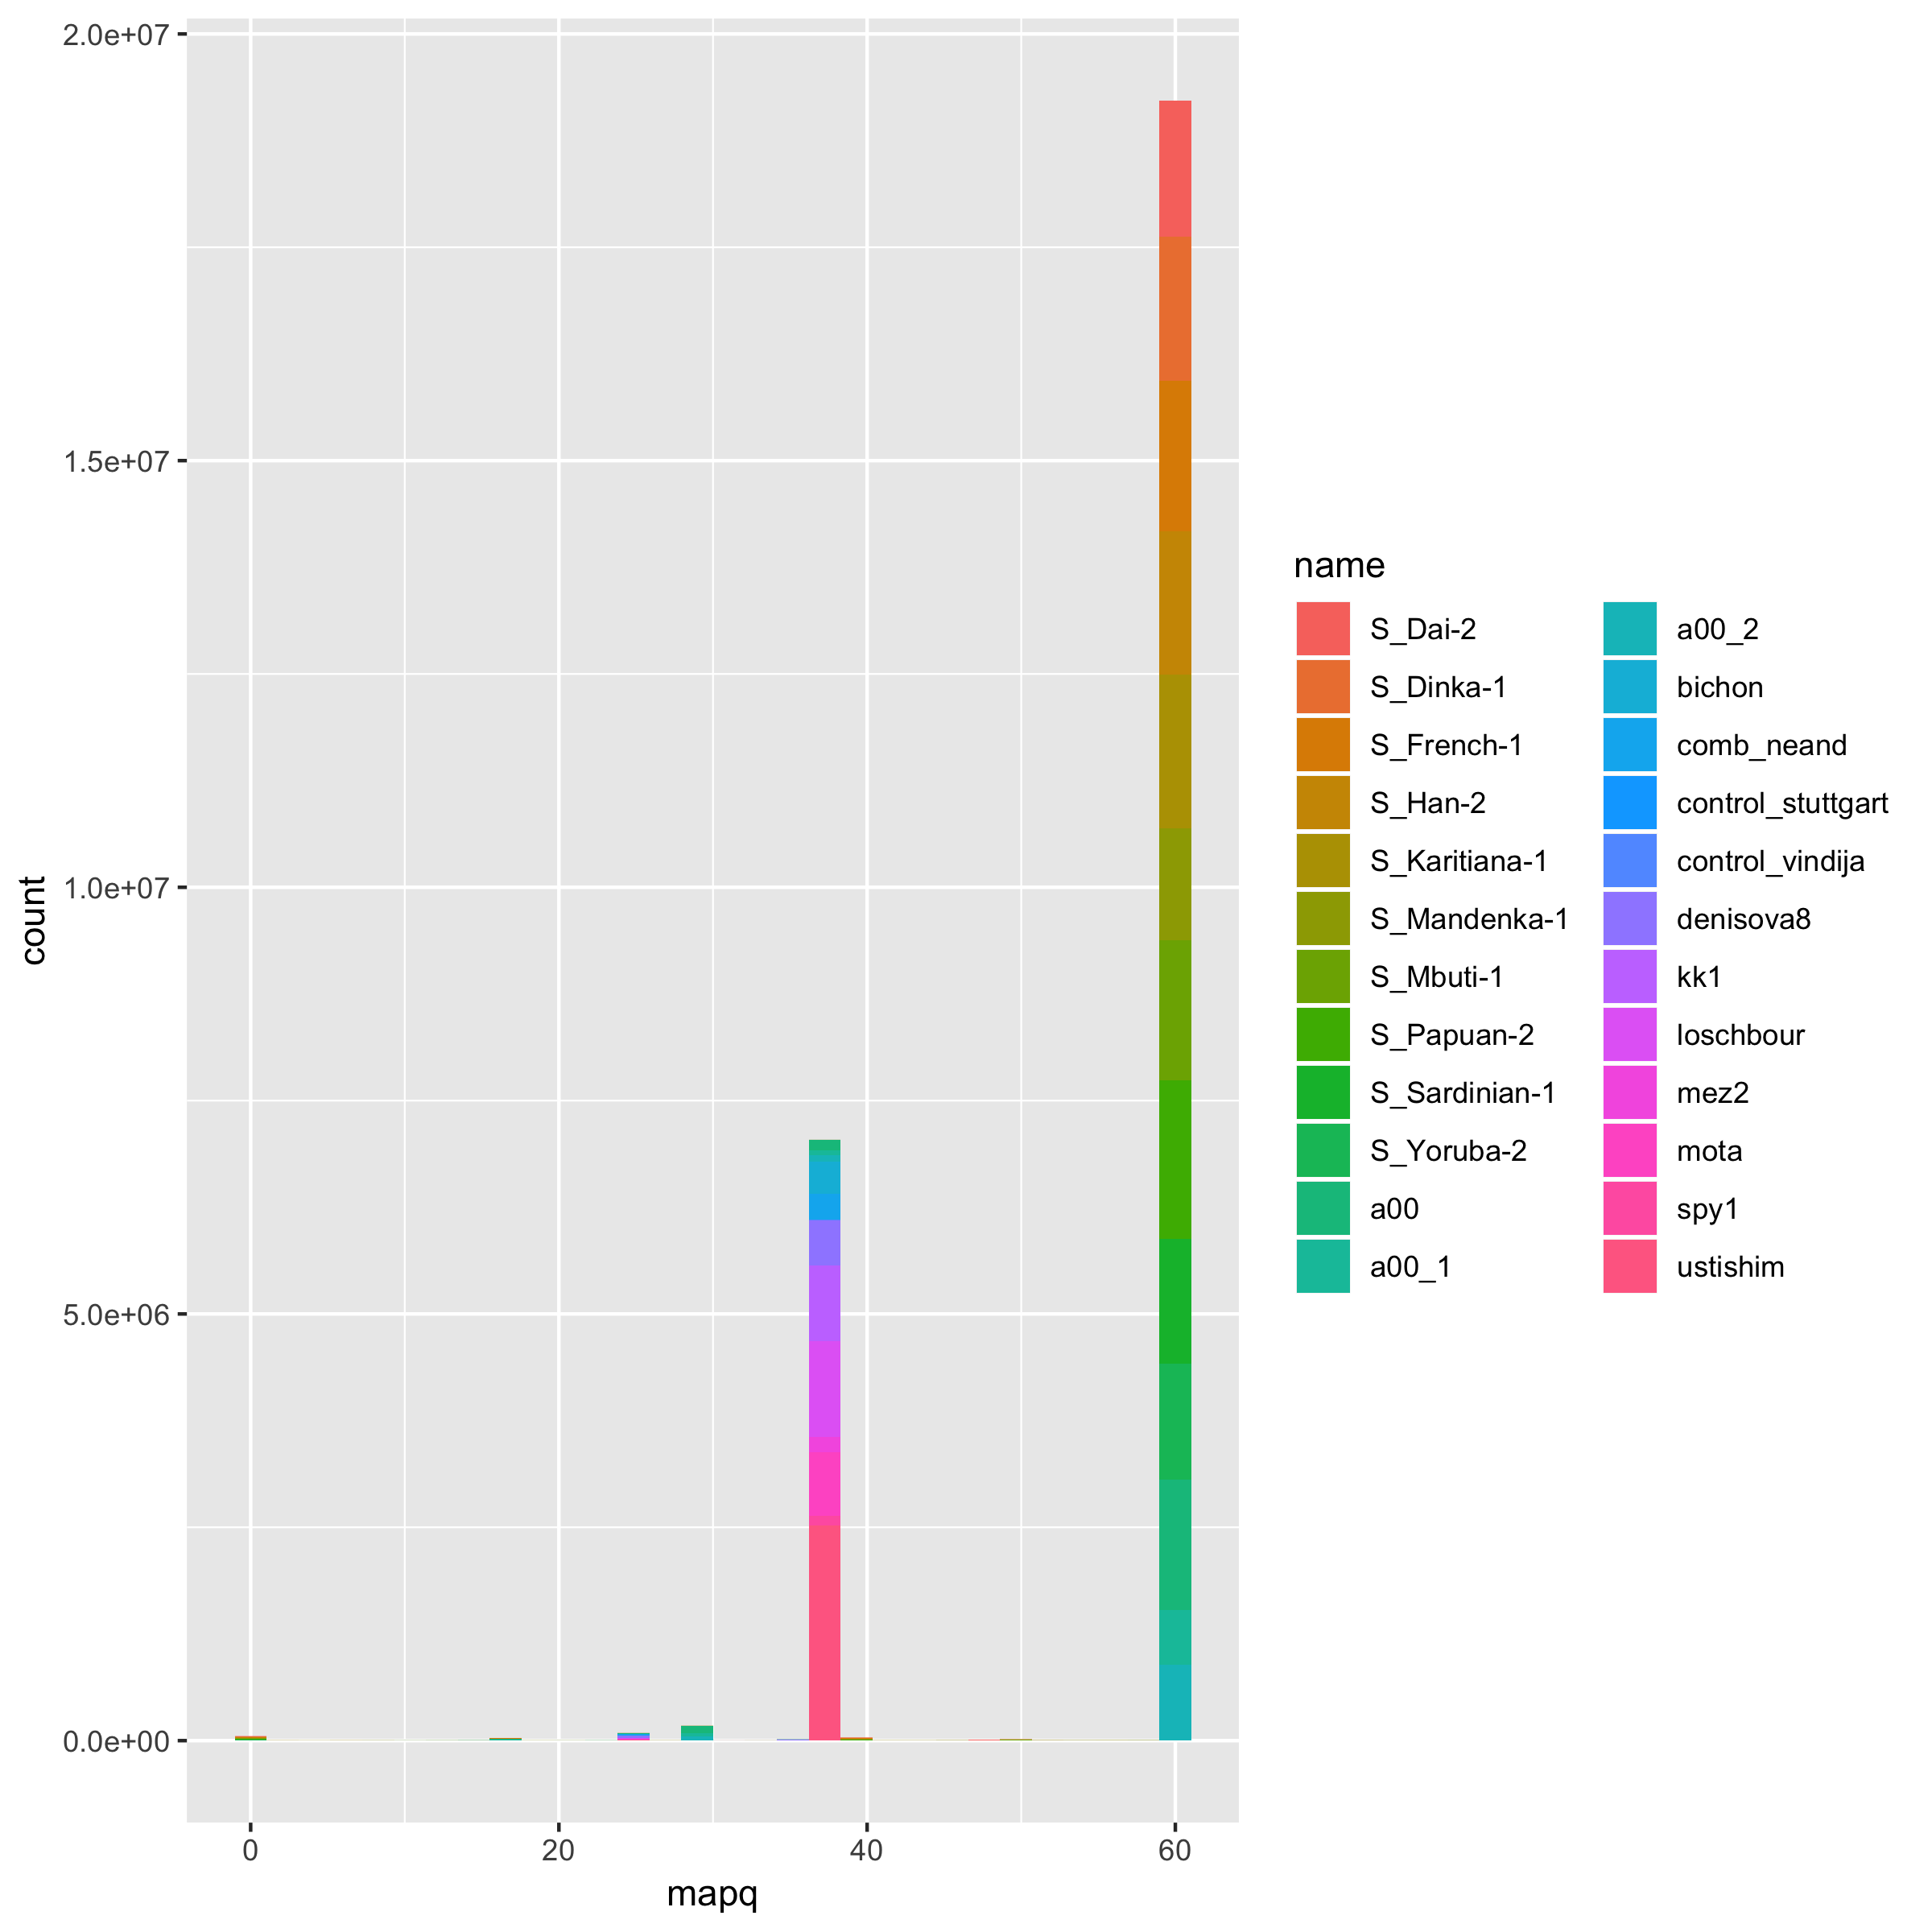

In [38]:
ggplot(mapq, aes(mapq, fill = name)) + geom_histogram()